enter material family:

 list of available families:
oxide, semiconductors, conductors, insulators, transparent, low density, high density, Ferrous, Carbide, Nitride
to choose a specific chemical system include 'please'


 ferrous oxide conductors


Materials Property Explorer

 filters applied:
oxide
conductors
ferrous

 Shipping Crystals...


Retrieving SummaryDoc documents:   0%|          | 0/3188 [00:00<?, ?it/s]


Exploration complete!


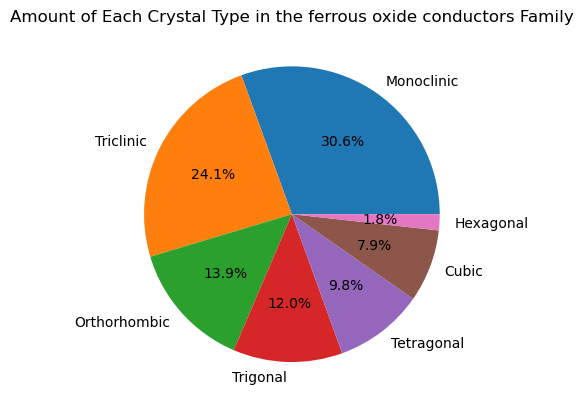

show table? y/n:


 n


search again? y/n:


 n


Have a great day


In [76]:
#crystal distrubiton script #get all your imports out of the way
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mp_api.client import MPRester
import plotly.express as px
import plotly.graph_objects as go
from pymatgen.core import Structure
from pymatgen.core.composition import Composition
#import crystal_toolkit #jupyter was having a fuss over this one for some reason
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

API_KEY = "PUT YOUR API KEY HERE PLEASE (AND ALSO THANK YOU)" #put your own key in, this one's mine (it's not there anymore)

def crystalDistributor(search): #define a function to use later for however many searches are done #"Crystal distributor" sounds funny
    filters=0 #set a filters counter so we can stop people from accidentally using no filters and making the program hate them
    chmsys = ""
    if "please" in search: #allow chemical system searches to happen because they don't give numbers that are really big, and also it's just kinda cool
        print("\n Thank you, what chemical system?:")
        print("(please input chemical system in the format X-Y-Z etc)")
        chmsys = input()
        filters=filters+1
    """
    Query for crystal systems based on material family
    """
    print("Materials Property Explorer") #^^^^ say stuff so you understand what's happening after you search ^^^^^
    print("==========================") 
    
    print("\n filters applied:")
    el = []
    bg = 0,10
    if "oxide" in search: #filtered ( a lot of filters)
        el.append("O") #add the element to the required elements list
        print("oxide")
        filters=filters+1 #add one to the filters counter
    if "semiconductors" in search:
        bg = 0.5,0.9
        print("semiconductors")
        filters=filters+1
    elif "conductors" in search: #uses else if instead of just if because the word conductors is in the word semiconductors
        bg =0,0.1
        print("conductors")
        filters=filters+1
    elif "insulators" in search:
        bg =3,10
        print("insulators")
        filters=filters+1
    elif "transparent" in search:
        bg = 0,3
        print("transparent")
        filters=filters+1
    if "low density" in search:
        dense = 0,3
        print("low density")
        filters=filters+1
    if "high density" in search:
        dense = 10,100
        print("high density")
        filters=filters+1
    if "ferrous" in search:
        el.append("Fe")
        print("ferrous")
        filters=filters+1
    if "nitride" in search:
        el.append("N")
        print("nitride")
        filters=filters+1
    if "carbide" in search:
        el.append("C")
        print("carbide")
        filters=filters+1
    if filters==0:
        bg =0.01,0.01038
        print("NONE???? REALLY????, please put some filters on so your computer does not become a jet engine")
        el ="B"
        search = "that's not an option"
    print("\n Shipping Crystals...") #loading symbol so the program feels more responsive
    # Connect to Materials Project with API key
    with MPRester(API_KEY) as mpr:
        # Query for all the materials in that chemical system
        docs = mpr.materials.summary.search( #make documents and then put data from the material summaries in those docs
            chemsys=[chmsys],
            elements=el,
            band_gap=(bg),
            fields = [ #put the following things in the doc. Thanks.
                "material_id", #gets the info it says on the tin and puts it into the doc, repeat for the other ones
                "formula_pretty", 
                "structure", 
                "density", 
                "band_gap",
                "formation_energy_per_atom",
                "volume", 
                "symmetry",
            ] #end list
        ) #end search
        # Extract data to a list of dictionaries
        data = [] #setup a list to add stuff to (also handily resets this list every time the search is used)
        for doc in docs: #for however many documents we made put all the data we put in docs earlier into a big table (a list of lists(docs actually))
            # Get crystal system from symmetry object if available
            try:
                crystal_system = doc.symmetry.crystal_system if hasattr(doc, 'symmetry') else "Unknown"
            except:
                crystal_system = "Unknown" 
            data.append({ #actually put the data from the docs in the list so that it can be made into a dataframe
                "material_id": doc.material_id, #extract material id from doc doc.material_id
                "formula": doc.formula_pretty, #extract etc etc
                "density": doc.density,
                "band_gap": doc.band_gap,
                "formation_energy": doc.formation_energy_per_atom,
                "volume": doc.volume,
                "crystal_system": crystal_system,
                "structure": doc.structure
            })
            
        
        # Convert to DataFrame
        df = pd.DataFrame(data) #make it a dataframe
        
        print("\nExploration complete!") #show that work is done
        # Select the lightest and heaviest materials
        crystalCounts = df["crystal_system"].value_counts()
        # Create bar chart
        plt.pie(crystalCounts,labels=crystalCounts.index, autopct="%1.1f%%")
        plt.xticks(rotation=90) #rotate the x-axis label so it's easier to read and not really comically wide
        #vvvvvvv labels (and titles) vvvvvvv
        Title = "Amount of Each Crystal Type in the " + search +" Family"
        plt.title(Title)
        # ^^^^^ titles (and labels) ^^^^^^
        plt.show() #make it show up
        dis = "n"                                       #make the table not show up unless wanted (dis is short for "display")
        print("show table? y/n:") #ask if you want to do ^^^^^
        dis = input() #take an input to know if you ^^^^
        if dis =="y": #check if you want to make the table show up
            display(df) #display it if you do want it
        cont = "n" #set continue status to no, until told otherwise (do not graph until graphen to[search? searchon?])
        print("search again? y/n:") #ask question
        cont = input() #answer question
        if cont =="y": #react to question
            print(f"\n list of available families:")#to stop you from putting things in weird (please)
            print("oxide, semiconductors, conductors, insulators, transparent, low density, high density, Ferrous, Carbide, Nitride" )
            print("to choose a specific chemical system include 'please'")
            print("enter new material family:")
            search = input()
            crystalDistributor(search) #put the new data back into the system
        else:
            print("Have a great day") #mandatory [not optional]
        return #it is done

print("enter material family:") #ask them the first time
print(f"\n list of available families:")#to stop you from putting things in weird (please)
print("oxide, semiconductors, conductors, insulators, transparent, low density, high density, Ferrous, Carbide, Nitride" )
print("to choose a specific chemical system include 'please'")
search = input() #thy search is my command #set the chemical system for the first search
crystalDistributor(search) #put it through 'the algorithm'